In [1]:
# !pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

## Đọc dữ liệu

In [3]:
df = pd.read_csv('output/data.csv')
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,China,203334,2680,4776,51,169380,2982,29178,274,141,...,160000000,111163,1439323776,Asia,7079,301366,9,2.0,0.04,20.0
1,USA,82747175,38858,1018718,186,80506860,41509,1221597,1415,247359,...,1001729381,2994507,334522343,North America,4,328,0,116.0,0.60,3652.0
2,India,43062097,2011,522223,0,42523311,1970,16563,698,30658,...,834717702,594272,1404606308,Asia,33,2690,2,1.0,0.00,12.0
3,Brazil,30355919,6456,662777,76,29411813,27459,281329,8318,140994,...,63776166,296221,215299307,South America,7,325,3,30.0,0.40,1307.0
4,France,28317915,13984,145257,197,26083461,202981,2089197,1677,432101,...,266484045,4066260,65535419,Europe,2,451,0,213.0,3.00,31879.0


## Câu 1: Tổng số ca nhiễm theo từng quốc gia (30 quốc gia có nhiều nhất)

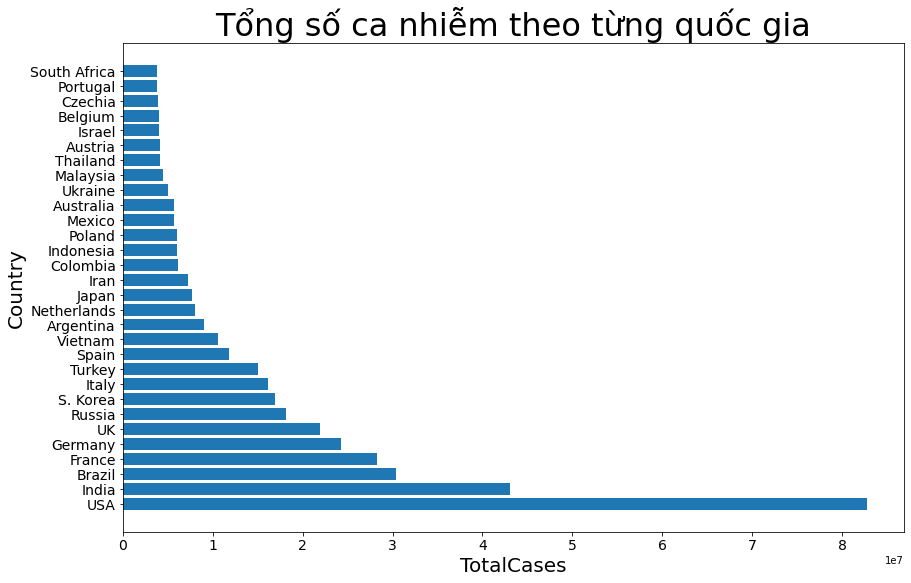

In [4]:
# chuẩn bị dữ liệu
total_df = df[['Country,Other', 'TotalCases', 'TotalDeaths', 'TotalRecovered']]
total_df = total_df.sort_values(by = ['TotalCases'], ascending = False)

# vẽ biểu đồ
fig, ax = plt.subplots(figsize = (14, 9))
ax.barh(total_df['Country,Other'][:30], total_df['TotalCases'][:30])
ax.set_title('Tổng số ca nhiễm theo từng quốc gia', fontsize = 32)
ax.set_xlabel('TotalCases', fontsize = 20)
ax.set_ylabel('Country', fontsize = 20)
ax.tick_params(labelsize = 14)
plt.show()

## Câu 2: Tổng số ca chết theo từng quốc gia (30 quốc gia có nhiều nhất)

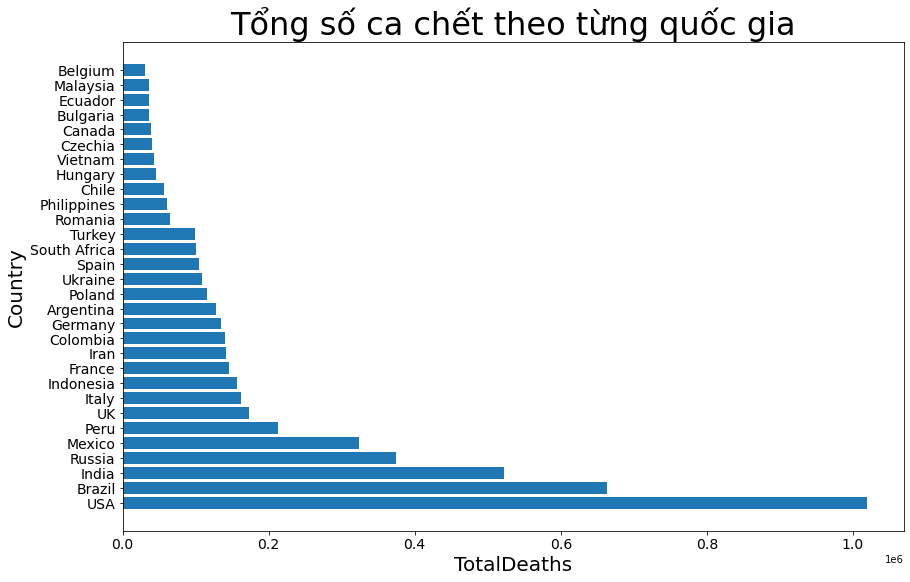

In [5]:
# chuẩn bị dữ liệu
total_df = total_df.sort_values(by = ['TotalDeaths'], ascending = False)

# vẽ biểu đồ
fig, ax = plt.subplots(figsize = (14, 9))
ax.barh(total_df['Country,Other'][:30], total_df['TotalDeaths'][:30])
ax.set_title('Tổng số ca chết theo từng quốc gia', fontsize = 32)
ax.set_xlabel('TotalDeaths', fontsize = 20)
ax.set_ylabel('Country', fontsize = 20)
ax.tick_params(labelsize = 14)
plt.show()

## Câu 3: Tổng số ca hồi phục theo từng quốc gia (30 quốc gia có nhiều nhất)

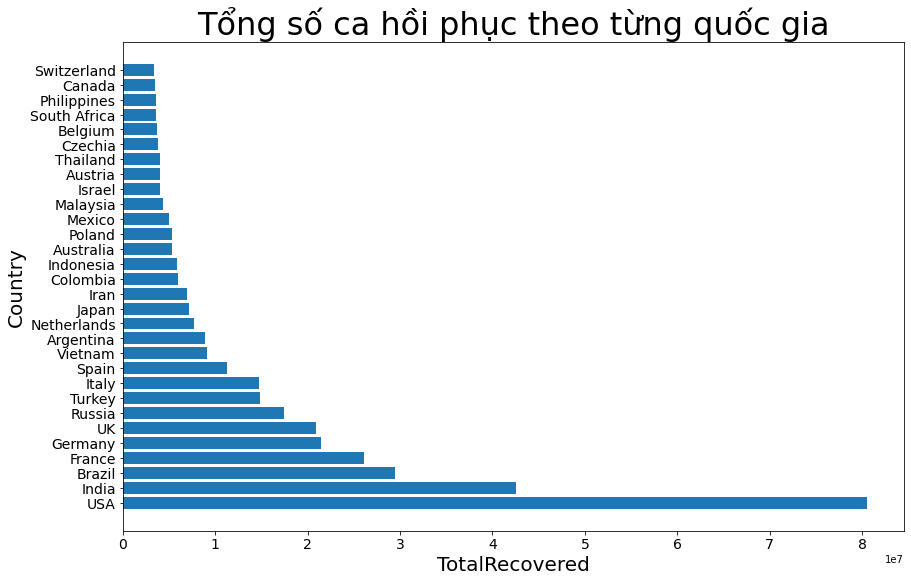

In [6]:
# chuẩn bị dữ liệu
total_df = total_df.sort_values(by = ['TotalRecovered'], ascending = False)

# vẽ biểu đồ
fig, ax = plt.subplots(figsize =(14, 9))
ax.barh(total_df['Country,Other'][:30], total_df['TotalRecovered'][:30])
ax.set_title('Tổng số ca hồi phục theo từng quốc gia', fontsize = 32)
ax.set_xlabel('TotalRecovered', fontsize = 20)
ax.set_ylabel('Country', fontsize = 20)
ax.tick_params(labelsize = 14)
plt.show()

## Câu 4: Tổng số ca nhiễm trên 1 triệu dân số theo từng quốc gia (30 quốc gia có nhiều nhất)

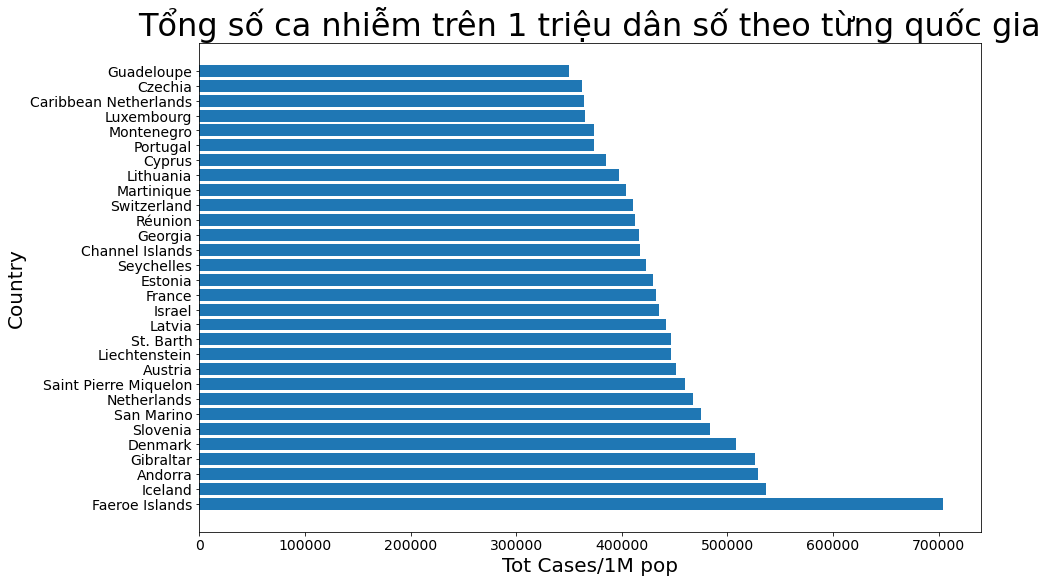

In [7]:
# chuẩn bị dữ liệu
total_per_1m_df = df[['Country,Other', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop']]
total_per_1m_df = total_per_1m_df.sort_values(by = ['Tot Cases/1M pop'], ascending = False)

# vẽ biểu đồ
fig, ax = plt.subplots(figsize = (14, 9))
ax.barh(total_per_1m_df['Country,Other'][:30], total_per_1m_df['Tot Cases/1M pop'][:30])
ax.set_title('Tổng số ca nhiễm trên 1 triệu dân số theo từng quốc gia', fontsize = 32)
ax.set_xlabel('Tot Cases/1M pop', fontsize = 20)
ax.set_ylabel('Country', fontsize = 20)
ax.tick_params(labelsize = 14)
plt.show()

## Câu 5: Tổng số ca chết trên 1 triệu dân số theo từng quốc gia (30 quốc gia có nhiều nhất)

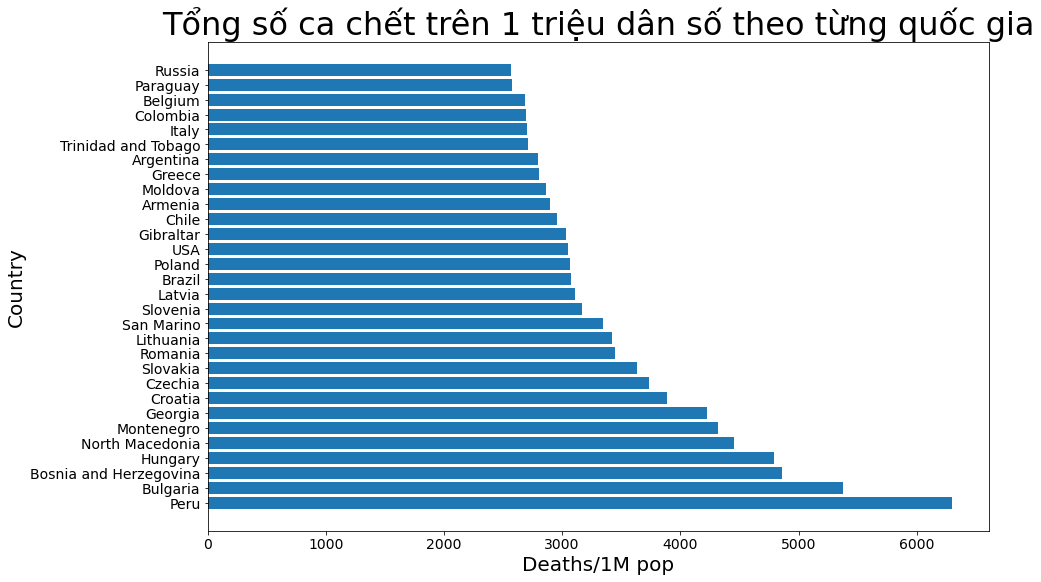

In [8]:
# chuẩn bị dữ liệu
total_per_1m_df = total_per_1m_df.sort_values(by = ['Deaths/1M pop'], ascending = False)

# vẽ biểu đồ
fig, ax = plt.subplots(figsize = (14, 9))
ax.barh(total_per_1m_df['Country,Other'][:30], total_per_1m_df['Deaths/1M pop'][:30])
ax.set_title('Tổng số ca chết trên 1 triệu dân số theo từng quốc gia', fontsize = 32)
ax.set_xlabel('Deaths/1M pop', fontsize = 20)
ax.set_ylabel('Country', fontsize = 20)
ax.tick_params(labelsize = 14)
plt.show()

## Câu 6: Tổng số ca đã test trên 1 triệu dân số theo từng quốc gia (30 quốc gia có nhiều nhất)

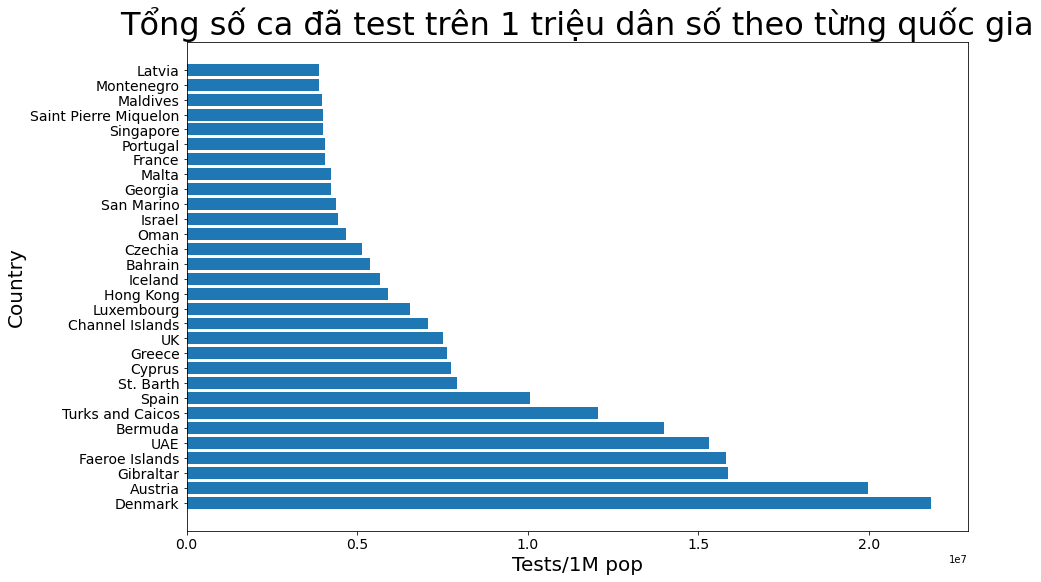

In [9]:
# chuẩn bị dữ liệu
total_per_1m_df = total_per_1m_df.sort_values(by=['Tests/1M pop'], ascending = False)

# vẽ biểu đồ
fig, ax = plt.subplots(figsize = (14, 9))
ax.barh(total_per_1m_df['Country,Other'][:30], total_per_1m_df['Tests/1M pop'][:30])
ax.set_title('Tổng số ca đã test trên 1 triệu dân số theo từng quốc gia', fontsize = 32)
ax.set_xlabel('Tests/1M pop', fontsize = 20)
ax.set_ylabel('Country', fontsize = 20)
ax.tick_params(labelsize = 14)
plt.show()

## Câu 7: Phần trăm ca nhiễm theo từng khu vực

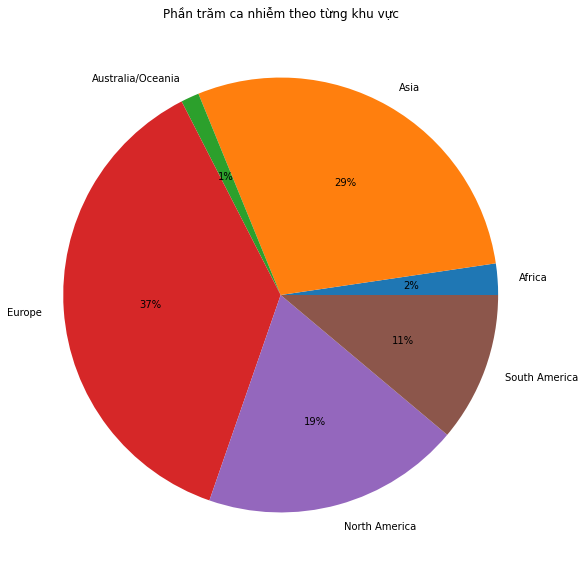

In [10]:
# chuẩn bị dữ liệu
TotalCases_Continent = df.groupby(["Continent"])["TotalCases"].sum()
TotalCases_Continent = TotalCases_Continent.reset_index()

# vẽ biểu đồ
fig = plt.figure(figsize = (10, 10))
plt.title("Phần trăm ca nhiễm theo từng khu vực")
plt.pie(TotalCases_Continent["TotalCases"], labels = TotalCases_Continent["Continent"], autopct = '%1.0f%%')
plt.show()

## Câu 8: Phần trăm ca chết theo từng khu vực

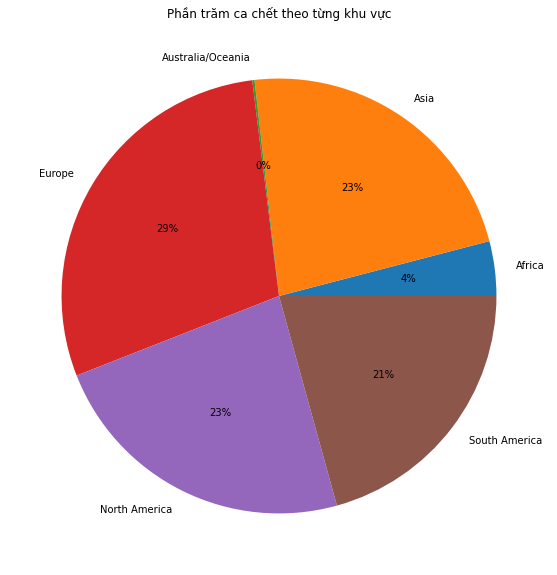

In [11]:
# chuẩn bị dữ liệu
TotalCases_Continent = df.groupby(["Continent"])["TotalDeaths"].sum()
TotalCases_Continent = TotalCases_Continent.reset_index()

# vẽ biểu đồ
fig = plt.figure(figsize = (10, 10))
plt.title("Phần trăm ca chết theo từng khu vực")
plt.pie(TotalCases_Continent["TotalDeaths"], labels = TotalCases_Continent["Continent"], autopct = '%1.0f%%')
plt.show()

## Câu 9: Phần trăm ca hồi phục theo từng khu vực

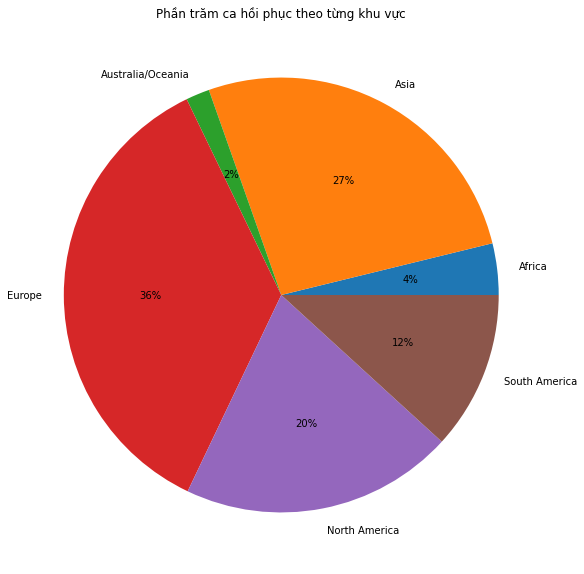

In [12]:
# chuẩn bị dữ liệu
TotalCases_Continent = df.groupby(["Continent"])["TotalRecovered"].sum()
TotalCases_Continent = TotalCases_Continent.reset_index()

# vẽ biểu đồ
fig = plt.figure(figsize =(10, 10))
plt.title("Phần trăm ca hồi phục theo từng khu vực")
plt.pie(TotalCases_Continent["TotalRecovered"], labels = TotalCases_Continent["Continent"], autopct = '%1.0f%%')
plt.show()

## Câu 10: Tỉ lệ giữa số lượng ca nhiễm và số lượng ca test theo từng quốc gia (30 quốc gia cao nhất)

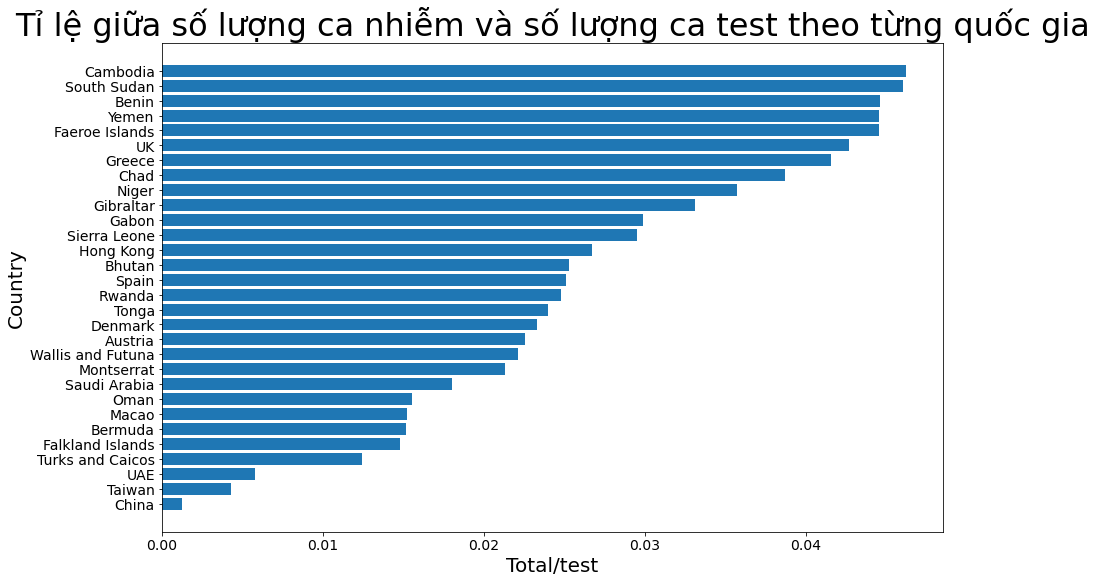

In [13]:
# chuẩn bị dữ liệu
relation_test_case = df[['Country,Other', 'TotalCases', 'TotalTests']]
relation_test_case = relation_test_case.reset_index()
relation_test_case['total_per_test'] =  relation_test_case['TotalCases'] / relation_test_case['TotalTests']
relation_test_case = relation_test_case.sort_values(by=['total_per_test'], ascending = True)

# vẽ biểu đồ
fig, ax = plt.subplots(figsize = (14, 9))
ax.barh(relation_test_case['Country,Other'][:30], relation_test_case['total_per_test'][:30])
ax.set_title('Tỉ lệ giữa số lượng ca nhiễm và số lượng ca test theo từng quốc gia', fontsize = 32)
ax.set_xlabel('Total/test', fontsize = 20)
ax.set_ylabel('Country', fontsize = 20)
ax.tick_params(labelsize = 14)
plt.show()

## Câu 11: Tỉ lệ giữa số lượng ca chết và số lượng ca nhiễm theo từng khu vực

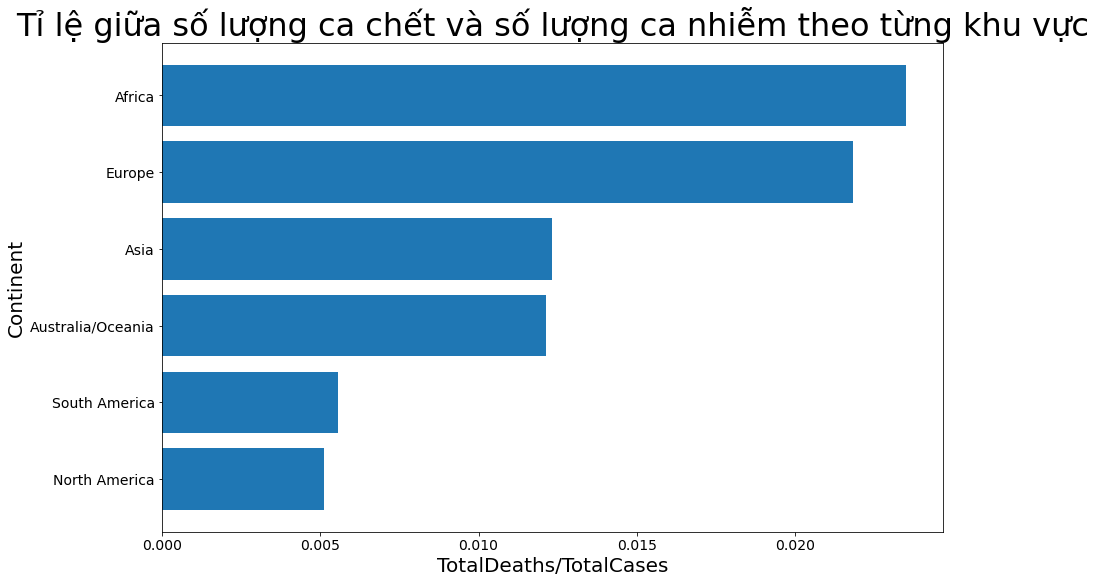

In [14]:
# chuẩn bị dữ liệu
TotalDeaths_div_TotalCases_Continent = df[["Continent", "TotalCases", "TotalDeaths"]]
TotalDeaths_div_TotalCases_Continent = df.groupby(["Continent"]).sum()
TotalDeaths_div_TotalCases_Continent = TotalDeaths_div_TotalCases_Continent.reset_index()
TotalDeaths_div_TotalCases_Continent["TotalDeaths/TotalCases"] = df["TotalDeaths"] / df["TotalCases"]
TotalDeaths_div_TotalCases_Continent = TotalDeaths_div_TotalCases_Continent.sort_values(by = "TotalDeaths/TotalCases")

# vẽ biểu đồ
fig, ax = plt.subplots(figsize = (14, 9))
ax.barh(TotalDeaths_div_TotalCases_Continent["Continent"], width = TotalDeaths_div_TotalCases_Continent["TotalDeaths/TotalCases"])
ax.set_title('Tỉ lệ giữa số lượng ca chết và số lượng ca nhiễm theo từng khu vực', fontsize = 32)
ax.set_xlabel('TotalDeaths/TotalCases', fontsize = 20)
ax.set_ylabel('Continent', fontsize = 20)
ax.tick_params(labelsize = 14)
plt.show()

## Câu 12: So sánh giữa số người đã test và chưa test COVID-19 của một vài quốc gia (30 quốc gia nổi bật)

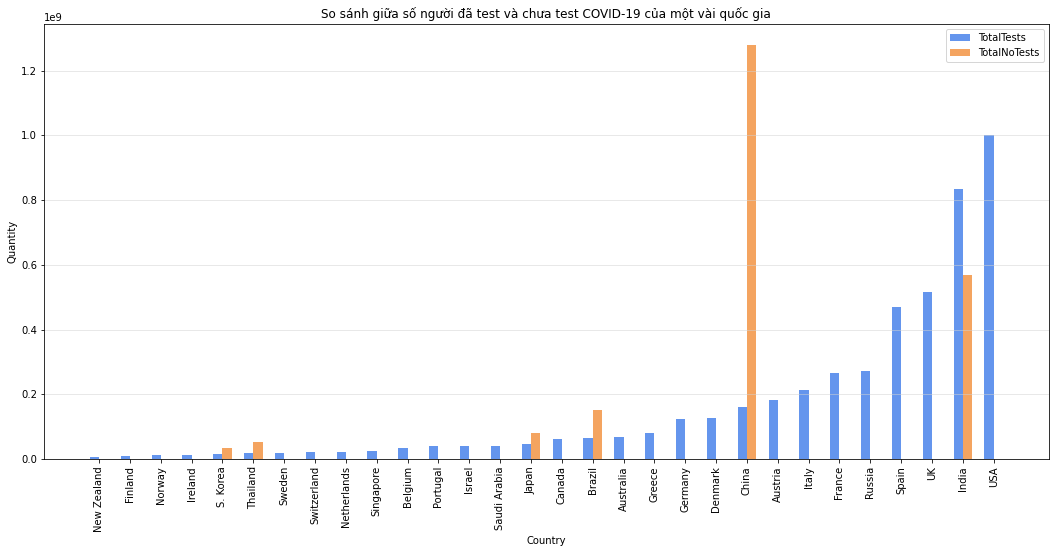

In [15]:
# các nước nổi bật
countries = ['Canada', 'Japan', 'Germany', 'Switzerland', 'Australia', 'USA', 'New Zealand', 'UK', 'Sweden', 'Netherlands', 
             'France', 'Denmark', 'Norway', 'Singapore', 'S. Korea', 'Italy', 'China', 'Finland', 'Spain', 'Belgium', 
             'Austria', 'Saudi Arabia', 'Ireland', 'Russia', 'India', 'Brazil', 'Greece', 'Thailand', 'Portugal', 'Israel']

# chuẩn bị dữ liệu
TotalNoTests_df = (df['Population'] - df['TotalTests']).apply(lambda x: 0 if x < 0 else x)
ActiveCases_RecoveredCases_df = pd.DataFrame({'Country,Other': df['Country,Other'], 
                                              'TotalTests': df['TotalTests'], 
                                              'TotalNoTests': TotalNoTests_df,
                                              'Tests/1M pop': df['Tests/1M pop']}).set_index('Country,Other')
ActiveCases_RecoveredCases_df = ActiveCases_RecoveredCases_df.loc[countries].sort_values(by = ['TotalTests'])

# vẽ biểu đồ
fig, ax = plt.subplots(1, figsize = (18, 8))
x = np.arange(len(countries))
plt.bar(x - 0.15, ActiveCases_RecoveredCases_df['TotalTests'].values, color = 'cornflowerblue', width = 0.3)
plt.bar(x + 0.15, ActiveCases_RecoveredCases_df['TotalNoTests'].values, color = 'sandybrown', width = 0.3)
plt.grid(color = 'lightgray', linewidth = 1, axis = 'y', alpha = 0.5)
plt.xticks(rotation = 90)
plt.xticks(x, ActiveCases_RecoveredCases_df.index)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.legend(ActiveCases_RecoveredCases_df.columns)
plt.title('So sánh giữa số người đã test và chưa test COVID-19 của một vài quốc gia')
plt.show()

## Câu 13: So sánh tỉ lệ giữa số ca nhiễm, hồi phục và chết của một vài quốc gia (10 quốc gia nổi bật)

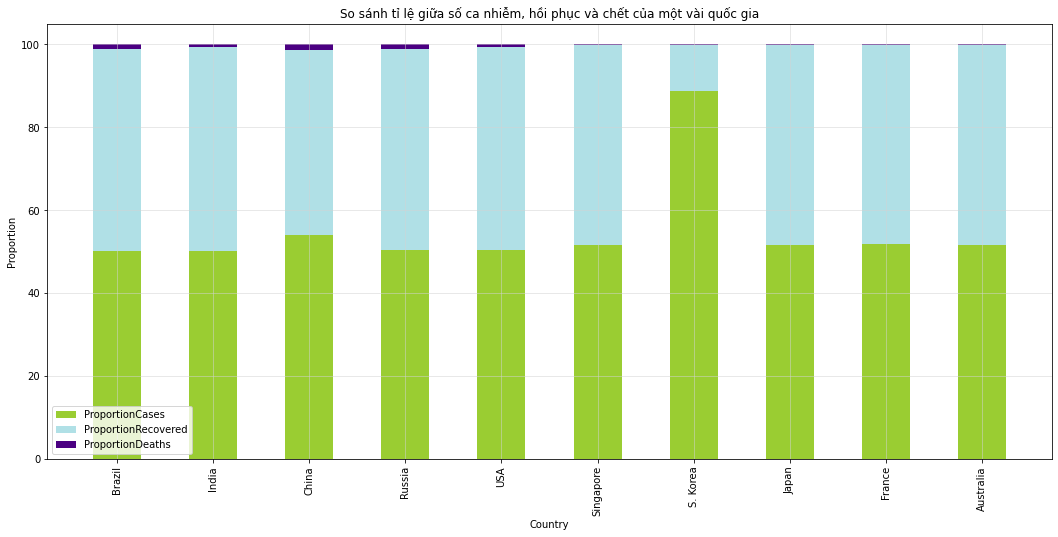

In [16]:
# các nước nổi bật
countries = ['Brazil', 'India', 'China', 'Russia', 'USA', 'Singapore', 'S. Korea', 'Japan', 'France', 'Australia']

# chuẩn bị dữ liệu
TotalSum = df['TotalCases'] + df['TotalRecovered'] + df['TotalDeaths']
Cases_Recovered_Deaths_df = pd.DataFrame({'Country,Other': df['Country,Other'],
                                          'ProportionCases': df['TotalCases'] * 100 / TotalSum,
                                          'ProportionRecovered': df['TotalRecovered'] * 100 / TotalSum,
                                          'ProportionDeaths': df['TotalDeaths'] * 100 / TotalSum}).set_index('Country,Other')
Cases_Recovered_Deaths_df = Cases_Recovered_Deaths_df.loc[countries]

# vẽ biểu đồ
fig, ax = plt.subplots(1, figsize = (18, 8))
y1 = Cases_Recovered_Deaths_df['ProportionCases'].values
y2 = Cases_Recovered_Deaths_df['ProportionRecovered'].values
y3 = Cases_Recovered_Deaths_df['ProportionDeaths'].values
plt.bar(Cases_Recovered_Deaths_df.index, y1, color = 'yellowgreen', width = 0.5)
plt.bar(Cases_Recovered_Deaths_df.index, y2, bottom = y1, color = 'powderblue', width = 0.5)
plt.bar(Cases_Recovered_Deaths_df.index, y3, bottom = y1 + y2, color = 'indigo', width = 0.5)
plt.grid(color = 'lightgray', linewidth = 1, axis = 'both', alpha = 0.5)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.legend(Cases_Recovered_Deaths_df.columns)
plt.title('So sánh tỉ lệ giữa số ca nhiễm, hồi phục và chết của một vài quốc gia')
plt.show()

## Câu 14: So sánh giữa số ca nhiễm, hồi phục và chết của một vài quốc gia theo góc độ của các quốc gia (5 quốc gia nổi bật)

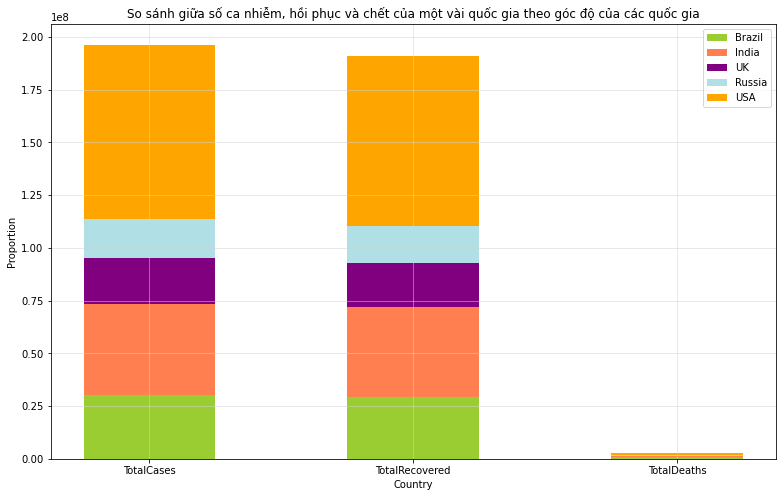

In [17]:
# 5 quốc gia nổi bật
countries = ['Brazil', 'India', 'UK', 'Russia', 'USA']

# chuẩn bị dữ liệu
Coronavirus_df = df[['Country,Other', 'TotalCases', 'TotalRecovered', 'TotalDeaths']].set_index('Country,Other').loc[countries].T

# vẽ biểu đồ
fig, ax = plt.subplots(1, figsize = (13, 8))
y1 = Coronavirus_df['Brazil'].values
y2 = Coronavirus_df['India'].values
y3 = Coronavirus_df['UK'].values
y4 = Coronavirus_df['Russia'].values
y5 = Coronavirus_df['USA'].values
plt.bar(Coronavirus_df.index, y1, color = 'yellowgreen', width = 0.5)
plt.bar(Coronavirus_df.index, y2, bottom = y1, color = 'coral', width = 0.5)
plt.bar(Coronavirus_df.index, y3, bottom = y1 + y2, color = 'purple', width = 0.5)
plt.bar(Coronavirus_df.index, y4, bottom = y1 + y2 + y3, color = 'powderblue', width = 0.5)
plt.bar(Coronavirus_df.index, y5, bottom = y1 + y2 + y3 + y4, color = 'orange', width = 0.5)
plt.grid(color = 'lightgray', linewidth = 1, axis = 'both', alpha = 0.5)
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.legend(Coronavirus_df.columns)
plt.title('So sánh giữa số ca nhiễm, hồi phục và chết của một vài quốc gia theo góc độ của các quốc gia')
plt.show()

## Câu 15: Mối tương quan giữa số ca nhiễm và số ca chết

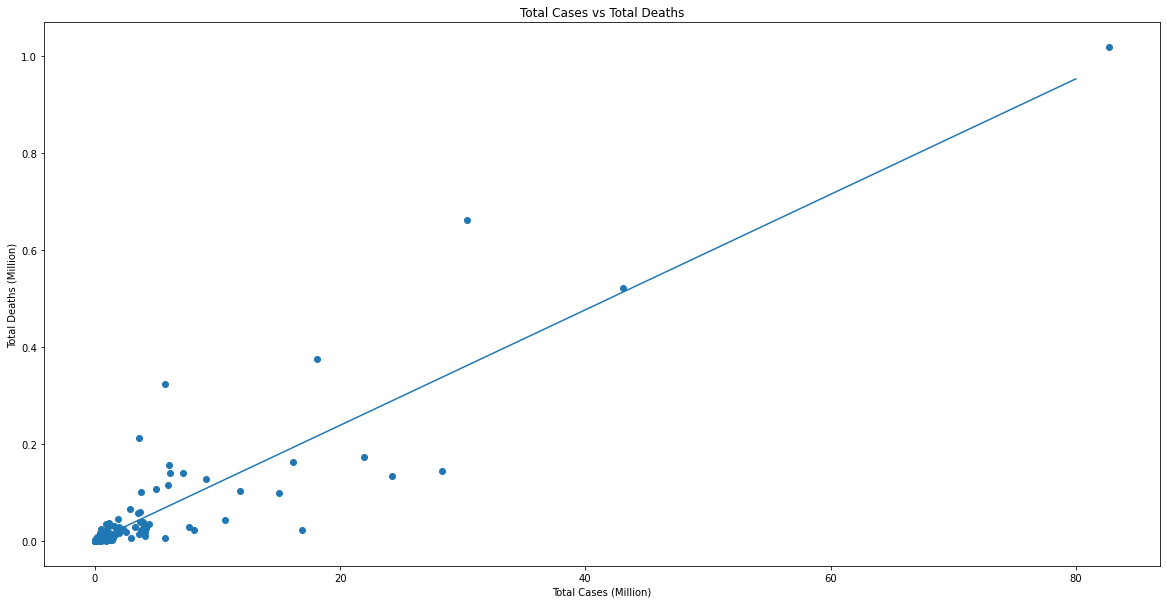

In [18]:
# Chuẩn bị dữ liệu
TotalCases_TotalDeaths = df[["TotalCases", "TotalDeaths"]] / 1000000

# Linear Regression
X = np.array([TotalCases_TotalDeaths["TotalCases"]]).T
y = np.array([TotalCases_TotalDeaths["TotalDeaths"]]).T
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
regr = linear_model.LinearRegression(fit_intercept = False)
regr.fit(Xbar, y)

# vễ biểu đồ
x0 = np.linspace(0, 80, 2)
y0 = regr.coef_[0,0] + regr.coef_[0,1] * x0

fig = plt.figure(figsize = (20, 10))
plt.scatter(TotalCases_TotalDeaths["TotalCases"], TotalCases_TotalDeaths["TotalDeaths"])
plt.plot(x0, y0)

#plt.axis([-5, 100, -0.05, 2])
plt.title("Total Cases vs Total Deaths")
plt.xlabel("Total Cases (Million)")
plt.ylabel("Total Deaths (Million)")
plt.show() 

## Câu 16: Mối tương quan giữa số ca nhiễm và số ca hồi phục

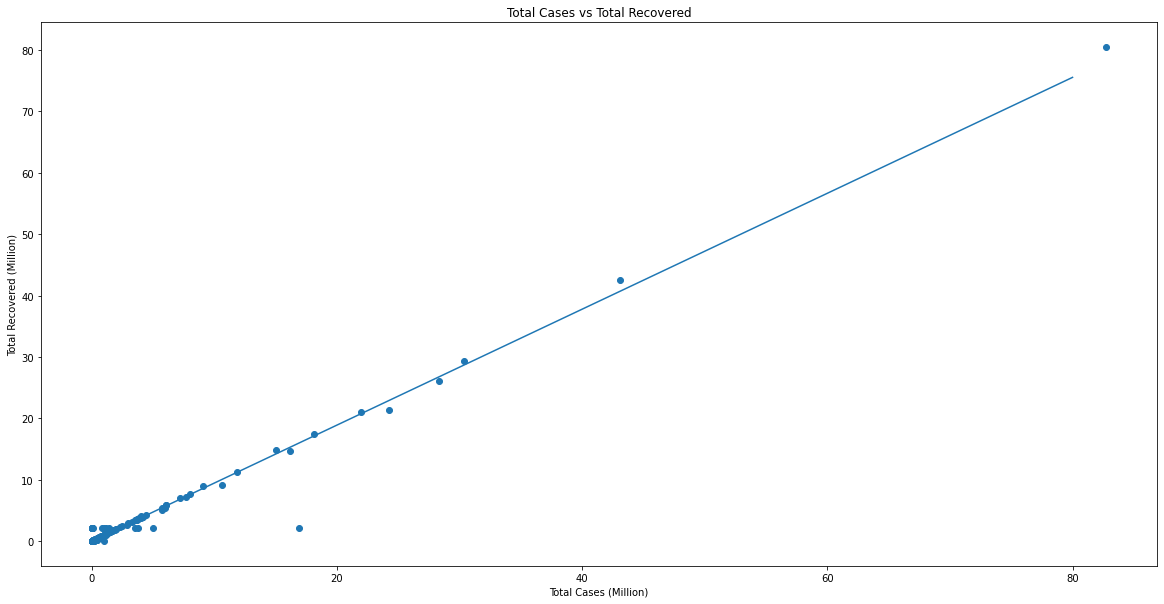

In [19]:
# Chuẩn bị dữ liệu
TotalCases_TotalDeaths = df[["TotalCases", "TotalRecovered"]] / 1000000

# Linear Regression
X = np.array([TotalCases_TotalDeaths["TotalCases"]]).T
y = np.array([TotalCases_TotalDeaths["TotalRecovered"]]).T
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
regr = linear_model.LinearRegression(fit_intercept = False)
regr.fit(Xbar, y)

# vễ biểu đồ
x0 = np.linspace(0, 80, 2)
y0 = regr.coef_[0,0] + regr.coef_[0,1] * x0

fig = plt.figure(figsize = (20, 10))
plt.scatter(TotalCases_TotalDeaths["TotalCases"], TotalCases_TotalDeaths["TotalRecovered"])
plt.plot(x0, y0)

#plt.axis([-5, 100, -0.05, 2])
plt.title("Total Cases vs Total Recovered")
plt.xlabel("Total Cases (Million)")
plt.ylabel("Total Recovered (Million)")
plt.show() 